In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from function import baseball_lambda

/Users/rosclay/Documents/VSCode/langgraph-multi-agent/venv/lib/python3.10/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `bind_tools` is in beta. It is actively being worked on, so the API may change.
  warn_beta(
Python REPL can execute arbitrary code. Use with caution.


In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Walks - {today}"

In [4]:
session_id = '17330'

In [5]:
task = "plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season."
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Retrieve'}}
----
Distance to neareast plan: 0.39248859882354736
{'Retrieve': {'next': 'Modify', 'nearest_plan': '1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup \n```\n\n2. Look up Danny Duffy\'s MLBAM player ID:\n\n```python\nduffy_id = playerid_lookup(\'duffy\', \'danny\')  \nduffy_mlbam_id = duffy_id[\'key_mlbam\'][0]\n```\n\n3. Get Danny Duffy\'s statcast pitching data for the 2018 season:\n\n```python \nduffy_2018_data = statcast_pitcher(\'2018-03-29\', \'2018-10-01\', player_id=duffy_mlbam_id)\n```\n\n4. Filter to only pitches that resulted in strikeouts, group by game date, and calculate the cumulative strikeout sum:\n\n```python\nduffy_2018_strikeouts = duffy_2018_data[duffy_2018_data[\'events\'] == \'strikeout\'] \nduffy_2018_strikeouts_by_date = duffy_2018_strikeouts.groupby(\'game_date\').size()\nduffy_2018_cum_strikeouts = duffy_2018_strikeouts_by_d

In [6]:
task = "include 10 labels on the x axis"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='plot the cumulative sum of total walks thrown by Shane Bieber in the 2020 season.', name='User'), AIMessage(content='1. Import the statcast_pitcher and playerid_lookup functions from pybaseball:\n\n```python\nfrom pybaseball import statcast_pitcher, playerid_lookup\n```\n\n2. Look up Shane Bieber\'s MLBAM player ID:\n\n```python\nbieber_id = playerid_lookup(\'bieber\', \'shane\')\nbieber_mlbam_id = bieber_id[\'key_mlbam\'][0]\n```\n\n3. Get Shane Bieber\'s statcast pitching data for the 2020 season:\n\n```python\nbieber_2020_data = statcast_pitcher(\'2020-07-23\', \'2020-10-27\', player_id=bieber_mlbam_id)\n```\n\n4. Filter to only pitches that resulted in walks, group by game date, and calculate the cumulative walk sum:\n\n```python\nbieber_2020_walks = bieber_2020_data[bieber_2020_data[\'events\'] == \'walk\']\nbieber_2020_walks_by_date = bieber_2020_walks.groupby(\'game_date\').size()\nbieber_202

{'Orchestrate': {'next': 'Execute'}}
----
Executing: # Import the statcast_pitcher and playerid_lookup functions from pybaseball
from pybaseball import statcast_pitcher, playerid_lookup
Executing: # Look up Shane Bieber's MLBAM player ID 
bieber_id = playerid_lookup('bieber', 'shane')
bieber_mlbam_id = bieber_id['key_mlbam'][0]
print(f"Shane Bieber's MLBAM player ID is {bieber_mlbam_id}")
Result: Gathering player lookup table. This may take a moment.
Shane Bieber's MLBAM player ID is 669456

Executing: # Get Shane Bieber's statcast pitching data for the 2020 season
bieber_2020_data = statcast_pitcher('2020-07-23', '2020-10-27', player_id=bieber_mlbam_id)
Result: Gathering Player Data

Executing: # Filter to only pitches that resulted in walks, group by game date, and calculate the cumulative walk sum
bieber_2020_walks = bieber_2020_data[bieber_2020_data['events'] == 'walk'] 
bieber_2020_walks_by_date = bieber_2020_walks.groupby('game_date').size()
bieber_2020_cum_walks = bieber_2020_wa

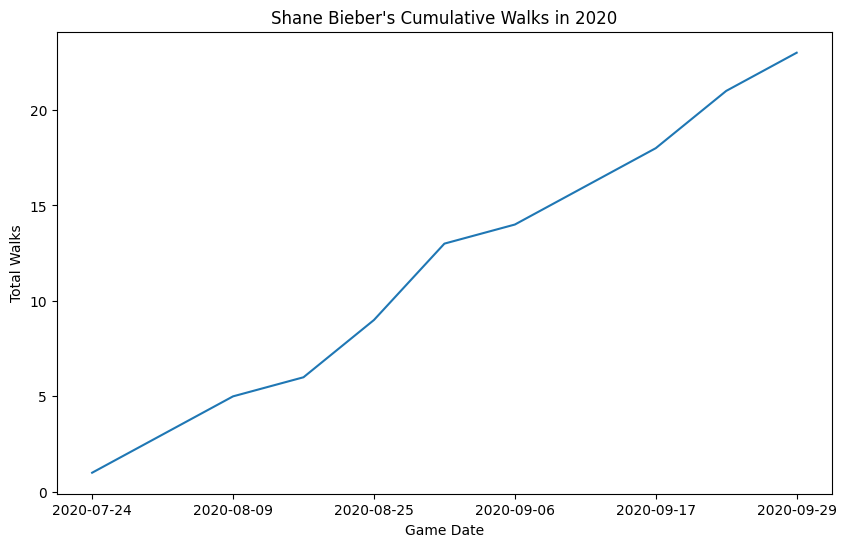

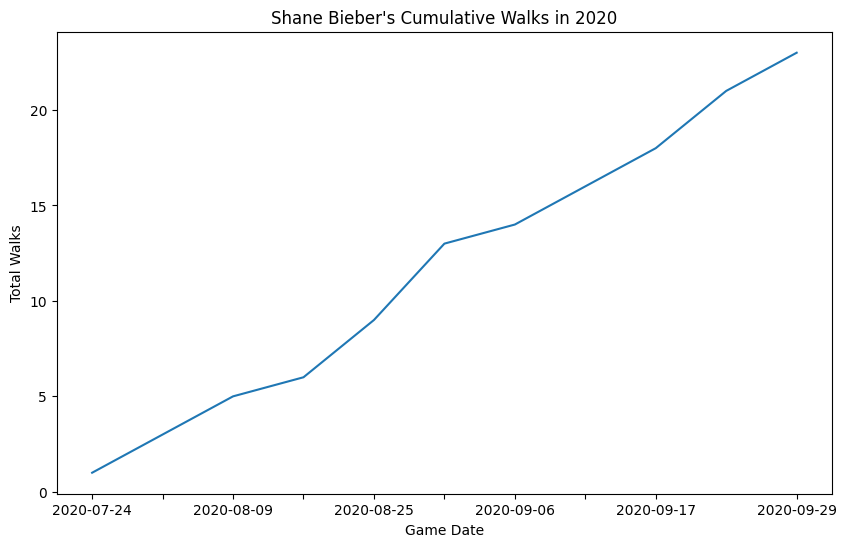

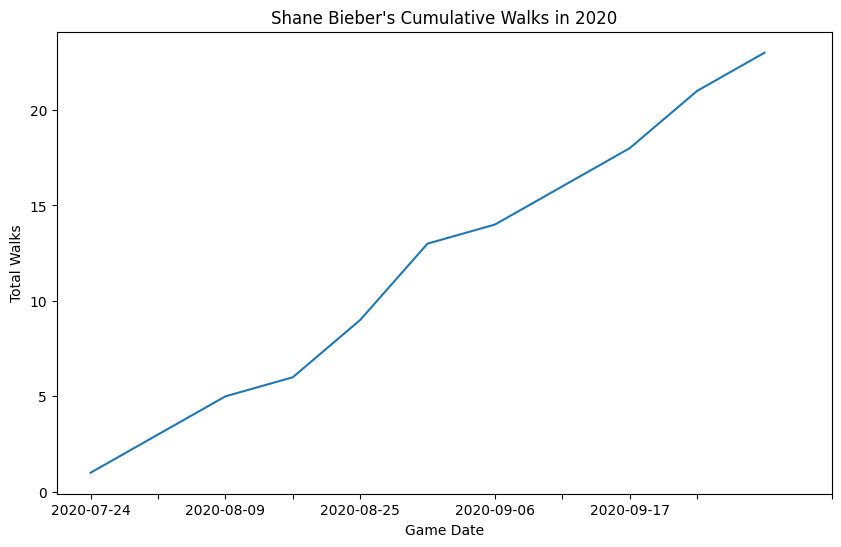

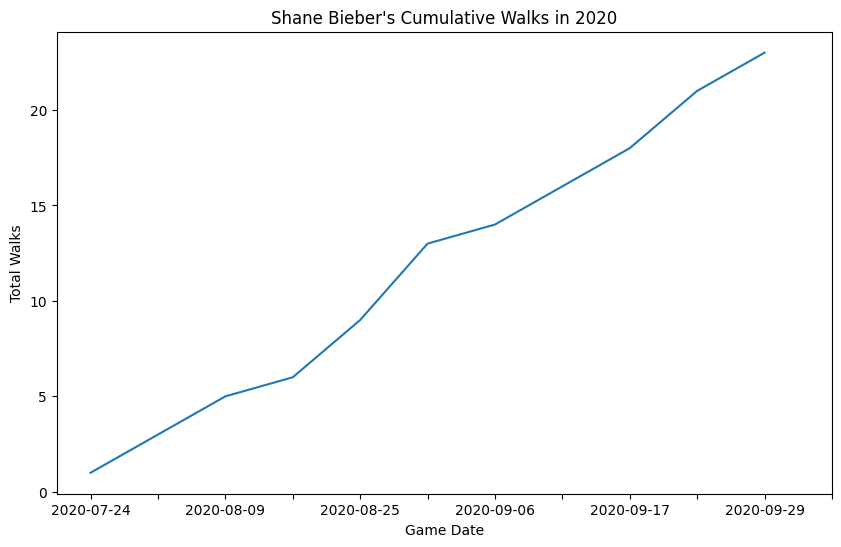

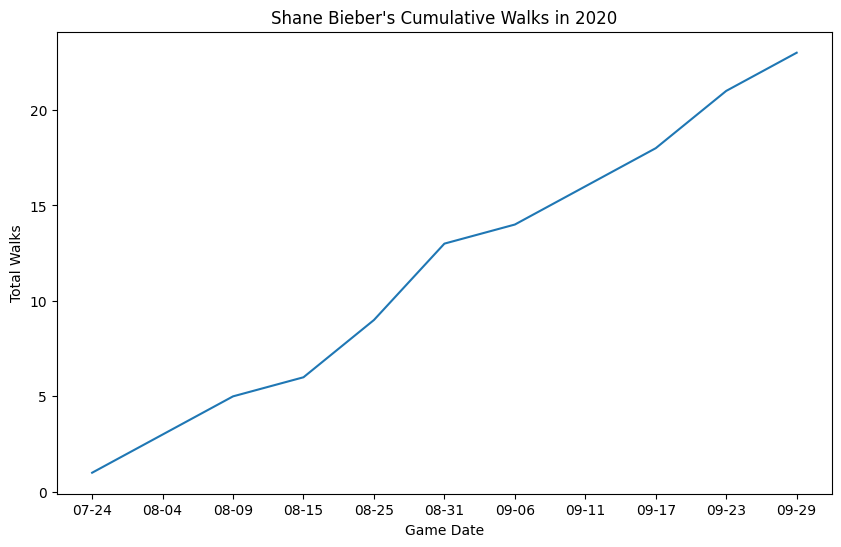

Result: The plot shows Shane Bieber's cumulative walk total over the course of the 2020 season. Each data point represents a game he pitched in, with the y-axis value being his total walks in the season up to that game. The plot has an increasing step-wise trend, with flat sections representing games where he did not issue any walks. The x-axis shows 10 evenly spaced labels with the dates of some of his games.

{'Execute': {'messages': [AIMessage(content="<thinking>\nGreat, the plot looks good now with 10 evenly spaced x-axis labels showing the dates of some of Shane Bieber's games in the 2020 season. The cumulative walk totals are plotted correctly on the y-axis.\n\nI believe we have successfully executed all steps of the plan:\n\n1. Imported the necessary functions from pybaseball\n2. Looked up Shane Bieber's MLBAM player ID \n3. Retrieved his 2020 statcast pitching data\n4. Filtered the data for walks, grouped by game date, and calculated the cumulative walk total\n5. Plotted the cu

In [7]:
task = "looks good"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [ ]:
task = "yes, thanks"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)